In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
%matplotlib inline

In [31]:
df = pd.read_csv('E://newone.csv')

In [32]:
df.columns

Index(['Unnamed: 0', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood_cleansed', 'city', 'smart_location', 'country_code',
       'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'requir

In [33]:
df.drop(['Unnamed: 0','host_has_profile_pic','host_identity_verified'], axis=1,inplace = True) # removing unwanted columns

In [34]:
df.isnull().sum() # checking for missing values

host_response_time                  0
host_response_rate                  0
host_is_superhost                   0
host_listings_count                 0
host_total_listings_count           0
street                              0
neighbourhood_cleansed              0
city                                0
smart_location                      0
country_code                        0
country                             0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
price                               0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
has_availabi

In [35]:
dups = df.duplicated()
dups.shape # No dups

(9516,)

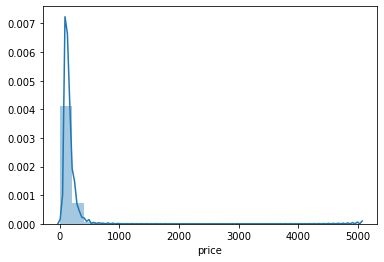

In [36]:
sns.distplot(df['price'], bins=25) # Checking outliers

In [37]:
df['price'].mean()

156.5561160151324

In [38]:
df['price'].median()

130.0

In [39]:
df['price'].max()

5040.0

In [40]:
df = df[df['price'] <= 1000.0] # removing outliers

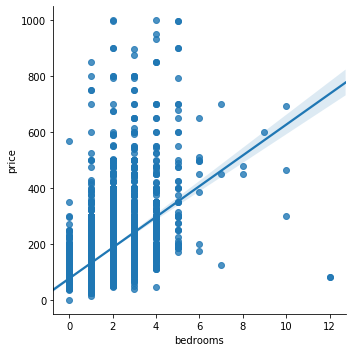

In [41]:
sns.lmplot(x = 'bedrooms', y = 'price', data = df)

HYPOTHESIS : As the number of bedrooms increases, the price of the apartment unit also increases

In [42]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['bedrooms'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [43]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [45]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# Predicting on the training set
y_predicted_train = regression.predict(X_train)

In [47]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[54.12324064]]
Mean squared error:  6291.9211809119615
R2 score:  0.26371824706296243


PREDICTION ON TEST DATA

In [49]:
# Predicting on test data
y_predicted = regression.predict(X_test)

In [55]:
X_test

array([[2.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [2.]])

In [56]:
# Dataframe comparing the actual and predicted values of the test data.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data['n_bed'] = X_test
data.head(30)

,Actual,Predicted,n_bed
0,150.0,186.282671,2.0
1,199.0,132.159430,1.0
2,130.0,132.159430,1.0
3,125.0,132.159430,1.0
4,100.0,132.159430,1.0
5,80.0,132.159430,1.0
6,130.0,132.159430,1.0
7,115.0,132.159430,1.0
8,125.0,132.159430,1.0
9,120.0,132.159430,1.0


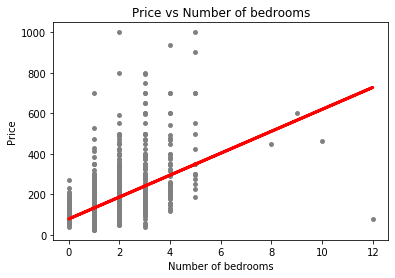

In [57]:
# How the Price varies depending on the number of bedrooms (Test data) 
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Number of bedrooms')
plot_test.xlabel('Number of bedrooms')
plot_test.ylabel('Price')
plot_test.show()

In [58]:
rmse = mean_squared_error(y_test, y_predicted) # The mean squared error on test data
r2 = r2_score(y_test, y_predicted) # The R2 test data score. 

In [59]:
# Performance on the test data

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[54.12324064]]
Mean squared error:  6218.261109552499
R2 score:  0.2849733997297268


NOTES: The linear regression model is not a very good fit for this data, as the R2 score is only 0.28. Perhaps removing outliers or more advanced models will capture the non-linearity relationship of the data. Therefore, we cannot confirm our hypothesis that as the number of bedrooms increases, the price also increases based on this model's results on the test data.

In [60]:
data.to_excel('E://forecast.xlsx')